# Logistic Regression using Pytorch

1. First install the libraries

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

## Loading data
In this example we are loading the data from MNIST dataset provided by torchvision

In [2]:
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)

Default image shape: torch.Size([1, 28, 28])
Reshaped image shape: torch.Size([28, 28])
The label for this image: 1


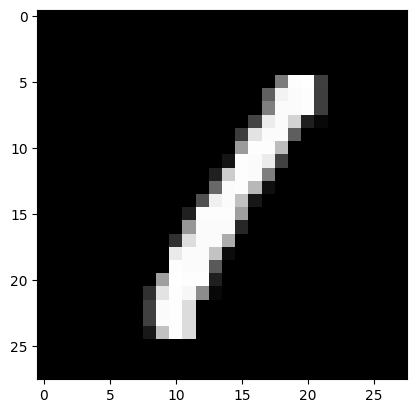

In [3]:
# Pick out the 4th (0-indexed) example from the training set
image, label = mnist_train[3]

# Plot the image
print("Default image shape: {}".format(image.shape))
image = image.reshape([28,28])
print("Reshaped image shape: {}".format(image.shape))
plt.imshow(image, cmap="gray")

# Print the label
print("The label for this image: {}".format(label))

## Shuffling the data
Once the dataset has been loaded, we are going to use DataLoader which is imported by
```python 
from torch.utils.data import DataLoader
```
Here we are loading the dataset in batches. This will help us with the program performance since we are not reading all the information at once. We also turned shuffle flag on
> shuffle (bool, optional) – set to True to have the data reshuffled at every epoch (default: False).

See 
[Data Loader Documentation](!https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)

In [4]:
train_loader = DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=100, shuffle=False)

In [5]:
data_train_iter = iter(train_loader)
images, labels = next(data_train_iter)
print("Shape of the minibatch of images: {}".format(images.shape))
print("Shape of the minibatch of labels: {}".format(labels.shape))

Shape of the minibatch of images: torch.Size([100, 1, 28, 28])
Shape of the minibatch of labels: torch.Size([100])


## The Logistic Regression Model

In [6]:
x = images.view(-1, 28*28)
print("The shape of input x: {}".format(x.shape))

The shape of input x: torch.Size([100, 784])


We inicialize the weigths and bias randomly

In [7]:
# Randomly initialize weights W
W = torch.randn(784, 10)/np.sqrt(784)
W.requires_grad_()

# Initialize bias b as 0s
b = torch.zeros(10, requires_grad=True)

In [9]:
# Linear transformation with W and b
y = torch.matmul(x, W) + b
print(y[0,:])

tensor([-0.0979, -0.1893, -0.0147,  0.2750,  0.4588, -0.0926,  0.3579, -0.2624,
        -0.0356, -0.1551], grad_fn=<SliceBackward0>)


We applied the softmax function [see library](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) ![Softmax equation](https://i.ytimg.com/vi/lvNdl7yg4Pg/maxresdefault.jpg) 

In the second option we used the function described in the library

In [10]:
# Option 1: Softmax to probabilities from equation
py_eq = torch.exp(y) / torch.sum(torch.exp(y), dim=1, keepdim=True)
print("py[0] from equation: {}".format(py_eq[0]))

# Option 2: Softmax to probabilities with torch.nn.functional
import torch.nn.functional as F
py = F.softmax(y, dim=1)
print("py[0] with torch.nn.functional.softmax: {}".format(py[0]))

py[0] from equation: tensor([0.0859, 0.0784, 0.0934, 0.1248, 0.1500, 0.0864, 0.1356, 0.0729, 0.0915,
        0.0812], grad_fn=<SelectBackward0>)
py[0] with torch.nn.functional.softmax: tensor([0.0859, 0.0784, 0.0934, 0.1248, 0.1500, 0.0864, 0.1356, 0.0729, 0.0915,
        0.0812], grad_fn=<SelectBackward0>)


In [16]:
print(labels.shape)

torch.Size([100])


Caclulating the cross_entropy, this will help us to know how good is our model. [See documentation)](https://pytorch.org/docs/stable/generated/torch.nn.functional.cross_entropy.html#torch.nn.functional.cross_entropy) ![](https://i.stack.imgur.com/gNip2.png)

In [12]:
# Cross-entropy loss from equation
cross_entropy_eq = torch.mean(-torch.log(py_eq)[range(labels.shape[0]),labels])
print("cross entropy from equation: {}".format(cross_entropy_eq))

# Option 2: cross-entropy loss with torch.nn.functional
cross_entropy = F.cross_entropy(y, labels)
print("cross entropy with torch.nn.functional.cross_entropy: {}".format(cross_entropy))

cross entropy from equation: 2.346263885498047
cross entropy with torch.nn.functional.cross_entropy: 2.3462636470794678


In [13]:
# Optimizer
optimizer = torch.optim.SGD([W,b], lr=0.1)

In [14]:
cross_entropy.backward()

In [15]:
b.grad

tensor([-0.0088,  0.0502,  0.0247, -0.0226, -0.0108, -0.0077,  0.0484, -0.0557,
        -0.0211,  0.0032])